<a href="https://colab.research.google.com/github/windyrahayu45/ML-PadangPanjang/blob/main/Segmentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv("dtsen_with_scores.csv")

# 2. Pilih fitur relevan
features = [
    "pendapatan_per_bulan",
    "pengeluaran_per_bulan",
    "jumlah_anggota_keluarga",
    "pendidikan_kepala_keluarga",
    "pekerjaan_kepala_keluarga",
    "kepemilikan_lahan",
    "kepemilikan_kendaraan",
    "kepemilikan_tabungan"
]

df_seg = df.copy()

# 3. Encode kategori
cat_cols = ["pendidikan_kepala_keluarga","pekerjaan_kepala_keluarga",
            "kepemilikan_lahan","kepemilikan_kendaraan","kepemilikan_tabungan"]
for c in cat_cols:
    df_seg[c] = LabelEncoder().fit_transform(df_seg[c].astype(str))

# 4. Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_seg[features])

# 5. Clustering (misalnya 3 segmen)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["socio_segment"] = kmeans.fit_predict(X_scaled)

# 6. Mapping segmen → label
segment_labels = {0:"Mampu", 1:"Menengah", 2:"Rentan"}
df["socio_segment_label"] = df["socio_segment"].map(segment_labels)

# 7. Ringkasan per segmen
summary = df.groupby("socio_segment_label")[["pendapatan_per_bulan","pengeluaran_per_bulan","jumlah_anggota_keluarga"]].mean()
print(summary)

# 8. Simpan hasil ke CSV
df.to_csv("dtsen_with_segments.csv", index=False)
print("✅ Dataset dengan segmen sosial-ekonomi berhasil disimpan: dtsen_with_segments.csv")


                     pendapatan_per_bulan  pengeluaran_per_bulan  \
socio_segment_label                                                
Mampu                        4.817457e+06           4.117153e+06   
Menengah                     2.138861e+06           1.756825e+06   
Rentan                       2.153102e+06           1.792254e+06   

                     jumlah_anggota_keluarga  
socio_segment_label                           
Mampu                               4.943299  
Menengah                            5.138710  
Rentan                              4.811258  
✅ Dataset dengan segmen sosial-ekonomi berhasil disimpan: dtsen_with_segments.csv


socio_segment_label  Mampu  Menengah  Rentan
kelurahan                                   
Balai-Balai             41        27      13
Bukit Surungan          30        19      25
Ekor Lubuk              27        26      22
Guguk Malintang         18        20      21
Kampung Jambak          22        23      18


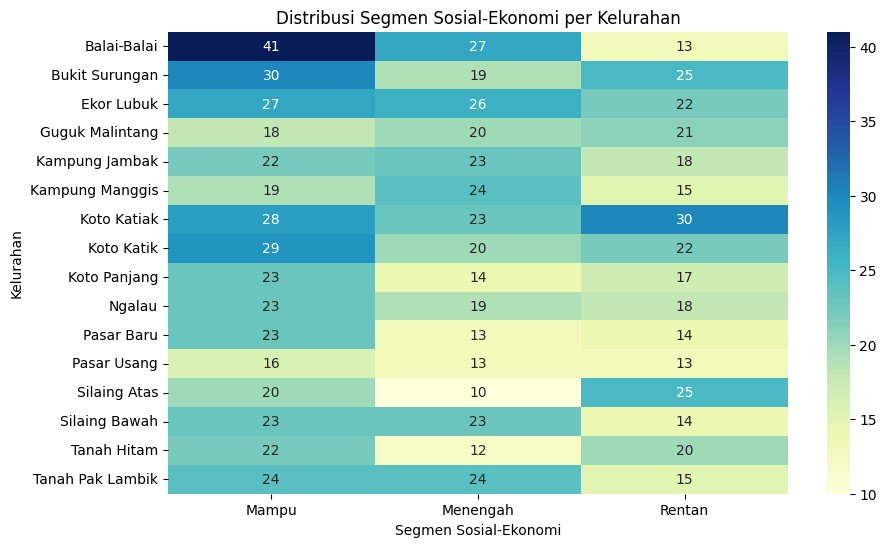

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung distribusi segmen per kelurahan
seg_per_kel = df.groupby(["kelurahan","socio_segment_label"]).size().reset_index(name="jumlah")

# Pivot agar jadi tabel per kelurahan
seg_pivot = seg_per_kel.pivot(index="kelurahan", columns="socio_segment_label", values="jumlah").fillna(0)

print(seg_pivot.head())

# Heatmap distribusi
plt.figure(figsize=(10,6))
sns.heatmap(seg_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Distribusi Segmen Sosial-Ekonomi per Kelurahan")
plt.ylabel("Kelurahan")
plt.xlabel("Segmen Sosial-Ekonomi")
plt.show()
